<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Цель проекта**: установить параметры, которые оказывают влияние на рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

Ознакомимся с данными, которые предстоит анализировать:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Разделителем в таблице служит табуляция, прочитаем файл с поправкой на разделитель:

In [2]:
data = pd.read_csv('/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице 23 699 наблюдений, 22 столбца, из которых только 8 не содержат пропусков. 2 столбца с логическими переменными, 14 - числами с плавающей точкой, 3 - целочисленных и 3 со строковыми данными. 

## Предобработка данных

Рассмотрим каждый столбец в отдельности. 
Сперва хотелось бы убедиться, что нет явно аномальных значений в тех столбцах, которые не содержат пропусков.

**Число фотографий объекта**:

In [4]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

**Цена квартиры**:

In [5]:
data['last_price'] = data['last_price'] / 1000000 # для удобства в дальнейшем переведём рубли в миллионы
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

**Общая площадь** квартиры:

In [6]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Максимальная площадь - 900 кв.м. Убедимся, что в данных нет ошибки:

In [7]:
data.sort_values(by = 'total_area').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5358,20,65.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140.0,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


12 комнат, 409 кв.м. жилой площади и цена в 420 млн. р. - эта квартира действительно существует. 

**Дата размещения объявления**:

In [8]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Столбец с датой первого выставления на продажу имеет тип 'object' и нулевые данные о времени. Преобразуем данные в формат даты:

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

**Количество комнат**:

In [10]:
print(data['rooms'].describe())
data.query('rooms == 0')

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2.450,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2.320,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2.480,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3.375,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1.850,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.200,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2.500,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3.350,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1.450,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


У нас 197 квартир с нулевым количеством комнат. Возможно, так обозначают квартиры-студии? Проверим: 

In [11]:
data.sort_values(by='rooms').head(10)[['rooms', 'studio', 'open_plan']]

,rooms,studio,open_plan
9412,0,False,True
8886,0,True,False
18132,0,True,False
20002,0,False,True
21425,0,True,False
12229,0,True,False
3019,0,False,True
2532,0,False,True
22047,0,True,False
2727,0,True,False


Похоже, это действительно так. Проверим, нет ли исключений с помощью соответствующего среза:

In [12]:
data.query('rooms == 0 and studio == False and open_plan == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Срез не содержит строк - значит, в количестве комнат, равным 0, ошибок нет - это действительно квартиры с открытой планировкой.

**Этаж**:

In [13]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Теперь поочерёдно займёмся столбцами с пропусками. Начнём с **высоты потолков**:

In [14]:
print(data['ceiling_height'].describe())
data.loc[data['ceiling_height'].isna()]

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2.890,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3.200,39.0,2017-12-16,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5.500,52.0,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1.350,30.0,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3.100,59.0,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Пропущенных значений - 38,7% от общего количества, зависимости с другими столбцами не наблюдается.  Вероятно, не все указывют этот параметр в объявлении. Не хотелось бы избавляться от такого количества наблюдений. 
Максимальное значение - 100 м, минимальное - 1 м, рассмотрим их подробнее: 

In [15]:
data.query('ceiling_height < 2 or ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3.600,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2.900,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1.400,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4.300,45.0,2018-02-01,2,25.00,9.0,30.0,2,NaN,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3.000,25.0,2017-09-27,0,27.00,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3.850,30.5,2018-10-03,1,24.00,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2.500,54.0,2017-10-13,2,27.00,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4.400,50.0,2017-08-08,2,26.00,9.0,21.3,3,NaN,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1.500,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8.150,80.0,2019-01-09,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


Аномальных данных о высоте потолков не так много - 32 строки, из них часть, вероятно, просто неверно записана (вместо 25 должно быть 2,5). Высота менее 2 метров - тоже наверняка ошибка.  Разделим все значения выше 25 на 10:

In [16]:
def change_ceiling(row):
    if row['ceiling_height'] >= 20:
        new_ceiling = row['ceiling_height'] / 10
        return new_ceiling
    new_ceiling = row['ceiling_height']
    return new_ceiling
data['ceiling_height'] = data.apply(change_ceiling, axis = 1)

Затем заполним пропуски медианным значением:

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [18]:
data.query('ceiling_height < 2 or ceiling_height > 6') # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1.40,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5712,5,1.50,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5863,20,5.65,45.0,2018-08-15,1,8.30,16.0,19.3,14,NaN,...,8.30,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5.60,56.4,2018-05-11,2,14.00,14.0,32.4,5,NaN,...,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5.60,67.0,2016-11-11,3,8.00,16.0,41.0,1,NaN,...,8.00,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
16934,5,4.10,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17442,0,5.35,54.0,2015-06-16,2,8.00,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22309,20,5.30,45.0,2017-09-30,1,10.30,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6.00,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
22869,0,15.00,25.0,2018-07-25,1,10.00,5.0,14.0,5,True,...,11.00,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Аномальных строк осталось 10, удалим их:

In [19]:
data = data.query('2 < ceiling_height < 8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23677 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23677 non-null  int64         
 1   last_price            23677 non-null  float64       
 2   total_area            23677 non-null  float64       
 3   first_day_exposition  23677 non-null  datetime64[ns]
 4   rooms                 23677 non-null  int64         
 5   ceiling_height        23677 non-null  float64       
 6   floors_total          23591 non-null  float64       
 7   living_area           21776 non-null  float64       
 8   floor                 23677 non-null  int64         
 9   is_apartment          2772 non-null   object        
 10  studio                23677 non-null  bool          
 11  open_plan             23677 non-null  bool          
 12  kitchen_area          21403 non-null  float64       
 13  balcony         

Данные об **этажности дома**:

In [20]:
print(data['floors_total'].describe())
data.loc[data['floors_total'].isna()]

count    23591.000000
mean        10.673477
std          6.595893
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11.640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2.438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9.788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6.051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3.600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8.500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4.574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14.569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21.187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропущенных значений - 86. Приравняем их к значению столбца с данными об этаже и будем считать, что эти объекты недвижимости расположены на последних этажах, чтобы не терять данные остальных столбцов для этих объектов. 

Также стоит перевести тип данных в этом столбце в int, поскольку количество этажей - целое число.

In [21]:
data['floors_total'] = data['floors_total'].fillna(data['floor'].transform(lambda x: x))
data['floors_total'] = data['floors_total'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23677 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23677 non-null  int64         
 1   last_price            23677 non-null  float64       
 2   total_area            23677 non-null  float64       
 3   first_day_exposition  23677 non-null  datetime64[ns]
 4   rooms                 23677 non-null  int64         
 5   ceiling_height        23677 non-null  float64       
 6   floors_total          23677 non-null  int32         
 7   living_area           21776 non-null  float64       
 8   floor                 23677 non-null  int64         
 9   is_apartment          2772 non-null   object        
 10  studio                23677 non-null  bool          
 11  open_plan             23677 non-null  bool          
 12  kitchen_area          21403 non-null  float64       
 13  balcony         



**Жилая площадь**:

In [22]:
print(data['living_area'].describe())
data.loc[data['living_area'].isna()]

count    21776.000000
mean        34.464234
std         22.035369
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64.900,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7.915,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2.200,32.80,2018-02-19,1,2.65,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1.990,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5.350,40.00,2018-11-18,1,2.65,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5.950,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6.400,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2.450,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2.500,35.00,2017-12-08,1,2.65,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Пропущенных значений - 1 903, это менее 8% от общего количества. Связи с другими столбцами не отмечается, так что вероятно, этот параметр также не заполнен в объявлениях случайным образом. Жилая площадь коррелирует с общей площадью квартиры, так что предлагаю заполнить пропущенные значения исходя из общей площади квартиры. 

In [23]:
print('Коэффициент коррелляции между жилой и общей площадью:', data['living_area'].corr(data['total_area']))
area_ratio = data['living_area'].mean() / data['total_area'].mean()
print('Отношение жилой площади к общей, в среднем:', area_ratio)

Коэффициент коррелляции между жилой и общей площадью: 0.9395467982918018
Отношение жилой площади к общей, в среднем: 0.5709802110756822


In [24]:
data['living_area'] = data['living_area'].fillna(data['total_area'].transform(lambda x: x * area_ratio))
print(data['living_area'].describe())

count    23677.000000
mean        34.601164
std         22.359988
min          2.000000
25%         19.000000
50%         30.000000
75%         42.138340
max        409.700000
Name: living_area, dtype: float64


Теперь в данных о жилой площади нет пропущенных значений.

Рассмотрим столбец с идентификатором для **апартаментов**:

In [25]:
print(data['is_apartment'].describe(), '\n')
print(data['is_apartment'].unique())
data.query('is_apartment == True')

count      2772
unique        2
top       False
freq       2723
Name: is_apartment, dtype: object 

[nan False True]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12.790000,56.60,2018-11-06,2,3.50,3,29.400000,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8.183000,70.00,2018-01-11,2,3.12,3,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34.878556,95.80,2014-12-09,2,2.65,6,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2.150000,20.10,2019-01-30,1,2.65,9,11.476702,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7.500000,152.00,2018-07-27,3,3.00,3,86.788992,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4.931398,42.90,2018-07-23,1,3.15,4,20.390000,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6.600000,95.00,2018-09-08,2,4.50,7,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4.779000,53.10,2016-05-16,1,2.65,13,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4.300000,50.00,2019-04-20,1,3.00,11,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6.900000,72.00,2019-03-25,3,3.50,4,70.000000,1,True,...,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


Апартаменты как тип жилья встречается нечасто, поэтому можно предположить, что люди, подававшие объявление, просто не указали этот параметр для своих квартир, поэтому предлагаю заменить все пустые значения на False.

In [26]:
data['is_apartment'] = data['is_apartment'].fillna(False) 
data['is_apartment'].describe()

count     23677
unique        2
top       False
freq      23628
Name: is_apartment, dtype: object

Данные о **площади кухни**:

In [27]:
print(data['kitchen_area'].describe(), '\n')

count    21403.000000
mean        10.571387
std          5.907338
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64 



Пропущенных значений - 2 278, или 9,6% от общего числа наблюдений. Предполагаем, что причина пропусков всё та же - не самое тщательное заполнение. Посмотрим, можно ли заполнить пропущенные значения таким же методом, что и данные о жилой площади:

In [28]:
print('Коэффициент коррелляции между площадью кухни и общей площадью:', data['kitchen_area'].corr(data['total_area']))
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
print('Отношение площади кухни к общей, в среднем:', kitchen_ratio)

Коэффициент коррелляции между площадью кухни и общей площадью: 0.6091374543182015
Отношение площади кухни к общей, в среднем: 0.17513962310303482


Зависимость не такая сильная, но она есть. Заполним пропуски, исходя из соотношения площади кухни к общей площади:

In [29]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'].transform(lambda x: x * kitchen_ratio))
print(data['kitchen_area'].describe())

count    23677.000000
mean        10.508119
std          6.042145
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


Рассмотрим данные о **количестве балконов**:

In [30]:
data['balcony'].describe()

count    12171.000000
mean         1.149454
std          1.070450
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Данные о наличии балкона не заполнили 48,6% владельцев. Вероятно, в этих квартирах нет ни одного балкона. Заполним пропущенные значения 0. К тому же этот столбец имеет тип float, в то время как количество балконов - целое число. Переведём его в тип int.

In [31]:
data['balcony'] = data['balcony'].fillna(0) 
data['balcony'] = data['balcony'].astype(int) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23677 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23677 non-null  int64         
 1   last_price            23677 non-null  float64       
 2   total_area            23677 non-null  float64       
 3   first_day_exposition  23677 non-null  datetime64[ns]
 4   rooms                 23677 non-null  int64         
 5   ceiling_height        23677 non-null  float64       
 6   floors_total          23677 non-null  int32         
 7   living_area           23677 non-null  float64       
 8   floor                 23677 non-null  int64         
 9   is_apartment          23677 non-null  bool          
 10  studio                23677 non-null  bool          
 11  open_plan             23677 non-null  bool          
 12  kitchen_area          23677 non-null  float64       
 13  balcony         

В данных о **названии населённого пункта** всего 49 пропусков (0,2% от общего числа объявлений). Посмотрим, какие вообще существуют варианты в этом столбце:

In [32]:
print(data['locality_name'].value_counts())
data.loc[data['locality_name'].isna()].head()

Санкт-Петербург                      15711
посёлок Мурино                         522
посёлок Шушары                         440
Всеволожск                             397
Пушкин                                 369
                                     ...  
деревня Пчева                            1
поселок Цвылёво                          1
деревня Кривко                           1
деревня Курковицы                        1
садовое товарищество Приладожский        1
Name: locality_name, Length: 364, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8.600000,81.7,2016-04-15,3,3.55,5,50.8,2,False,...,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5.398000,80.0,2017-05-30,3,2.65,4,42.6,2,False,...,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3.351765,42.7,2015-09-20,1,2.65,24,15.6,3,False,...,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5.130593,62.4,2015-10-11,2,2.65,24,33.1,21,False,...,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4.200000,46.5,2016-05-28,2,2.65,5,30.8,5,False,...,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


У нас в таблице нет других столбцов, по которым можно было бы восстановить название населённого пункта, поэтому предлагаю удалить строки с пропущенными значениями: 0,2% на общую картину не повлияют. 

In [33]:
data.dropna(subset = ['locality_name'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  float64       
 2   total_area            23628 non-null  float64       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23628 non-null  float64       
 6   floors_total          23628 non-null  int32         
 7   living_area           23628 non-null  float64       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          23628 non-null  float64       
 13  balcony         

In [34]:
data['locality_name'] = data['locality_name'].apply(lambda x: x.replace('поселок', 'посёлок'))

Следующие несколько столбцов очень схожи по количеству пропусков: данные о **ближайшем аэропорте**, **расстоянии до центра населённого пункта**, **количество парков и водоёмов в радиусе 3 км**. Вероятно, одни и те же люди не заполнили в объявлениях эти параметры. Проверим:

In [35]:
data.loc[data['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2.89,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,9.10000,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2.90,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,8.81000,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3.89,54.00,2016-06-30,2,2.65,5,30.000000,5,False,...,9.00000,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5.00,58.00,2017-04-24,2,2.75,25,30.000000,15,False,...,11.00000,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2.20,32.80,2018-02-19,1,2.65,9,18.728151,2,False,...,5.74458,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Похоже, наше предположение верно. Таких пропусков около 23,5% от общего числа наблюдений - многовато для того, чтобы просто исключить. Поскольку данные о расстоянии до центра нам ещё понадобятся для дальнейшего анализа, пока оставим пропуски без изменений. А вот данные о количестве парков и водоёмов в радиусе 3 км можно заполнить 0. Также переведём тип столбца из flow в int, поскольку будем иметь дело только с целыми числами.

In [36]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int) 
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Теперь рассмотрим данные о расстоянии до ближайших парков. В этих столбцах пропущено более 60% значений. 
Вероятно, люди просто не знают точного расстояния до парков и водоёмов, и не утруждают себя заполнением этих столбцов. Однако, у нас есть куда больше данных о наличии парков и водоёмов в радиусе 3 км. Вероятно, если парков и водоёмов в радиусе 3 км нет, столбец с расстоянием можно заполнить 0. Проверим: 

In [37]:
print(data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'] != 0) & (data['parks_around3000'].isna() == False)].head(10))
print(data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'] != 0) & (data['ponds_around3000'].isna() == False)].head(10))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Наше предположение верно: массивы пусты, данные о расстояниях пропущены для тех объектов недвижимости, в радиусе 3 км от которых нет ни парков, ни водоёмов. Значит, можем заменить пропущенные значения нулями:

In [38]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  float64       
 2   total_area            23628 non-null  float64       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23628 non-null  float64       
 6   floors_total          23628 non-null  int32         
 7   living_area           23628 non-null  float64       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          23628 non-null  float64       
 13  balcony         

Нам осталось рассмотреть столбец с данными о **длительности экспозиции**:

In [39]:
print(data['days_exposition'].describe())
data.loc[data['days_exposition'].isna()].head(10)

count    20452.000000
mean       180.778408
std        219.828353
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
7,5,7.915,71.6,2019-04-18,2,2.65,24,40.882183,22,False,...,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,0.0,0,0.0,NaN
44,13,5.350,40.0,2018-11-18,1,2.65,22,22.839208,3,False,...,7.005585,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
45,17,5.200,50.6,2018-12-02,2,2.65,9,30.300000,7,False,...,7.000000,0,Санкт-Петербург,30011.0,12872.0,0,0.0,0,0.0,NaN
46,17,6.600,52.1,2019-01-31,2,2.60,24,29.700000,9,False,...,8.300000,2,Санкт-Петербург,15114.0,12702.0,0,0.0,0,0.0,NaN
49,1,3.050,30.8,2018-11-22,1,2.50,9,18.000000,7,False,...,6.000000,0,Санкт-Петербург,45341.0,16603.0,1,675.0,0,0.0,NaN
52,20,11.795,136.0,2017-09-22,6,3.00,2,94.000000,2,False,...,11.000000,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,0.0,NaN
71,20,4.850,57.5,2019-03-27,3,2.50,9,39.000000,8,False,...,6.200000,0,Санкт-Петербург,33623.0,12267.0,1,334.0,1,333.0,NaN
81,9,10.949,68.0,2018-12-27,1,2.65,10,38.826654,6,False,...,11.909494,0,Санкт-Петербург,0.0,NaN,0,0.0,0,0.0,NaN
84,11,2.400,43.9,2019-03-13,2,2.65,2,27.460000,1,False,...,5.200000,0,Кировск,0.0,NaN,0,0.0,0,0.0,NaN


Пропущено 13,6% от общего числа наблюдений, достаточно много, однако, заполнить пробелы достоверно исходя из имеющихся данных вряд ли получится, поэтому пока оставим пропуски в неизменном виде.  

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  float64       
 2   total_area            23628 non-null  float64       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23628 non-null  float64       
 6   floors_total          23628 non-null  int32         
 7   living_area           23628 non-null  float64       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          23628 non-null  float64       
 13  balcony         

Остаётся проверить таблицу на возможные дубликаты:

In [41]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

### Вывод 

На этом предобработка данных завершена. Что мы сделали в рамках предварительной работы с данными:
- преобразовали столбец с данными о дате начала продаж в тип datetime, а столбцы с количеством балконов и этажей - в тип int;
- пропущенные данные о жилой площади и площади кухни заполнили в соотношении к общей;
- заполнили медианой пропущеные данные о высоте потолков, исключили аномально маленькие и большие значения;
- заполнили пропущенные значения о количестве комнат нулями исходя из данных об открытых планировках и квартирах-студиях;
- заполнили пропущенные данные о типе жилья (апартаменты или квартира);
- заполнили нулями пропущенные данные о количестве балконов, ближайших парках и водоёмах, расстоянии до аэропорта;
- исключили строки с пропущенными данными о названии населённого пункта.

После предобработки у нас в таблице осталось 23 628 наблюдений, мы удалили всего 0,3% от всех наблюдений. На данном этапе без изменений оставили пропуски в столбце с расстояниями до центра населённого пункта.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец со стоимостью квадратного метра жилья:

In [42]:
data['m_price'] = (data['last_price'] / data['total_area']).round(2) # округляем до сотых
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.12
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0,0.08
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.09
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.785854,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,0.41
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.10


Добавим столбцы с днём недели, месяцем и годом публикации: 

In [43]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday # день недели 
data['exposition_month'] = data['first_day_exposition'].dt.month     # месяц
data['exposition_year'] = data['first_day_exposition'].dt.year       # год
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,16028.0,1,482.0,2,755.0,NaN,0.12,3,3,2019
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,18603.0,0,0.0,0,0.0,81.0,0.08,1,12,2018
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,13933.0,1,90.0,2,574.0,558.0,0.09,3,8,2015
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.785854,9,False,...,6800.0,2,84.0,3,234.0,424.0,0.41,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,8098.0,2,112.0,1,48.0,121.0,0.10,1,6,2018


Категоризируем данные об этажах со следующими вариантами:
- первый
- последний
- другой

In [44]:
def floors_category(row):                                  # функция для выделения категорий
    if row['floor'] == 1:                                  # проверяем условие
        return 'Первый'                                    # возвращаем новую категорию
    if row['floor'] == row['floors_total'] and row['floor'] != 1:                            
        return 'Последний'
    return 'Другой'
data['floors_category'] = data.apply(floors_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1,482.0,2,755.0,NaN,0.12,3,3,2019,Другой
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0.0,0,0.0,81.0,0.08,1,12,2018,Первый
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,1,90.0,2,574.0,558.0,0.09,3,8,2015,Другой
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.785854,9,False,...,2,84.0,3,234.0,424.0,0.41,4,7,2015,Другой
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2,112.0,1,48.0,121.0,0.10,1,6,2018,Другой


Добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [45]:
data['living_total_ratio'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_total_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,0.12,3,3,2019,Другой,0.47,0.23
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0.0,81.0,0.08,1,12,2018,Первый,0.46,0.27
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558.0,0.09,3,8,2015,Другой,0.61,0.15
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.785854,9,False,...,3,234.0,424.0,0.41,4,7,2015,Другой,0.57,0.18
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,0.10,1,6,2018,Другой,0.32,0.41


### Вывод

В таблицу добавлены следующие столбцы:
- цена за квадратный метр
- день недели, месяц и год, в котором опубликовано объявление
- категория этажа: первый/последний/другой
- соотношение жилой площади и площади кухни к общей площади квартиры

## Исследовательский анализ данных

Изучим данные о **площади объектов**:

count    23628.000000
mean        60.340192
std         35.672709
min         12.000000
25%         40.000000
50%         52.000000
75%         69.762500
max        900.000000
Name: total_area, dtype: float64


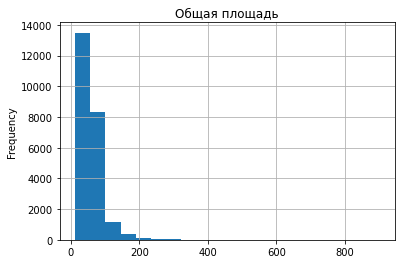

In [46]:
data['total_area'].plot(kind='hist', bins=20, title='Общая площадь', grid=True)
print(data['total_area'].describe())

Средняя площадь квартир - 60 кв.м., медиана - 52 кв.м., минимальная - 12 кв.м. (скорее всего, комната, а не квартира), есть несколько объектов огромной площади - 600 и даже 900 кв.м. Такая недвижимость не является ликвидной и скорее служит выбросом в наших данных, поскольку это единичные объекты. Отбросим объекты недвижимости с площадью более 200 кв.м. и менее 20 кв.м.:

count    23374.000000
mean        58.212685
std         26.501329
min         20.000000
25%         40.000000
50%         52.000000
75%         68.900000
max        200.000000
Name: total_area, dtype: float64

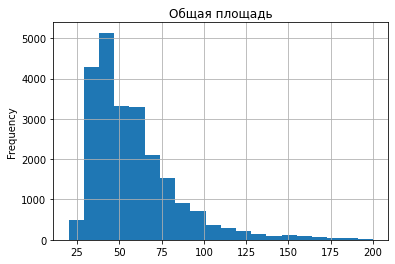

In [47]:
data_clear = data.query('20 <= total_area <= 200')
data_clear['total_area'].plot(kind='hist', bins=20, title='Общая площадь', grid=True)
data_clear['total_area'].describe()

Медианное значение площади не изменилось - 52 кв.м., большая часть объектов имеют площадь от 40 до 69 кв.м. Исключение экстремальных значений повлияло на значение средней (изменилась с 60 до 58 кв.м.) и стандартное отклонение (изменилось с 35 до 26). При этом мы избавились всего от 254 объектов, или 1% данных. 


Теперь посмотрим, как распределена **стоимость** объектов недвижимости.

count    23628.000000
mean         6.543037
std         10.900806
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


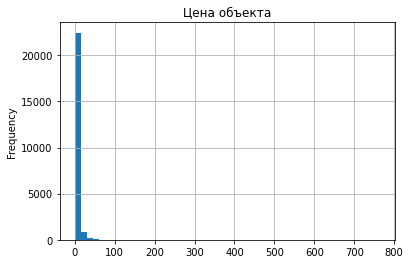

In [48]:
data['last_price'].plot(kind='hist', bins=50, title='Цена объекта', grid=True)
print(data['last_price'].describe())

Видно, что разброс стоимости в исходных данных огромен: от 12 тыс. руб. до 763 млн. руб. при том, что основная масса объектов выставляется в диапазоне от 3,4 до 6,8 млн. руб. Посмотрим те же метрики для данных, очищенных от неликвидной недвижимости:

count    23374.000000
mean         6.030954
std          6.244884
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64


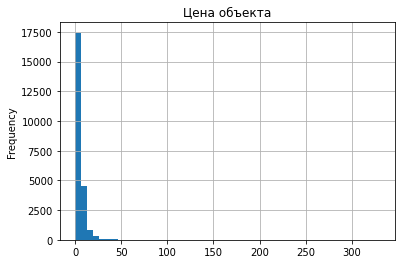

In [49]:
data_clear['last_price'].plot(kind='hist', bins=50, title='Цена объекта', grid=True)
print(data_clear['last_price'].describe())

Уже лучше, но у нас всё ещё есть очень дорогие объекты. Посмотрим на них подробнее:

In [50]:
data_clear.query('last_price > 50').sort_values(by = 'last_price').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio
16647,15,122.0000,145.0,2017-04-25,3,3.30,6,36.0,2,False,...,3,250.0,335.0,0.84,1,4,2017,Другой,0.25,0.50
4996,20,124.0000,124.5,2017-10-12,4,3.00,4,67.2,2,False,...,3,172.0,45.0,1.00,3,10,2017,Другой,0.54,0.16
17912,17,135.0000,166.0,2019-02-07,3,3.30,7,52.0,1,False,...,3,215.0,NaN,0.81,3,2,2019,Первый,0.31,0.39
22831,18,289.2384,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,3,188.0,NaN,1.54,1,3,2019,Последний,0.34,0.16
1436,19,330.0000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,3,285.0,233.0,1.74,2,4,2018,Другой,0.50,0.21


Исключим из рассмотрения два объекта, которые выбиваются из общей картины: при сопоставимой площади, стоимость за квадратный метр у них значительно выше, чем у аналогов. 

count    23372.000000
mean         6.004976
std          5.574809
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        135.000000
Name: last_price, dtype: float64


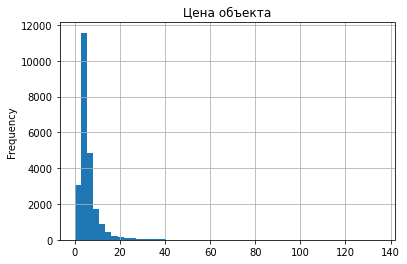

In [51]:
data_clear = data_clear.query('last_price <= 150')  # оставляем только объекты со стоимостью до 150 мл.н р.
data_clear['last_price'].plot(kind='hist', bins=50, title='Цена объекта', grid=True)
print(data_clear['last_price'].describe())

Пока что оставим "длинный хвост" нашего распределения, чтобы не исключить совсем из рассмотрения категорию элитной недвижимости. Средняя стоимость квартир - 6 млн. руб., медианное значение - 4,6 млн. руб.

Рассмотрим столбец с **количеством комнат**, будем работать сразу с очищенным массивом:

count    23372.000000
mean         2.035855
std          0.995346
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


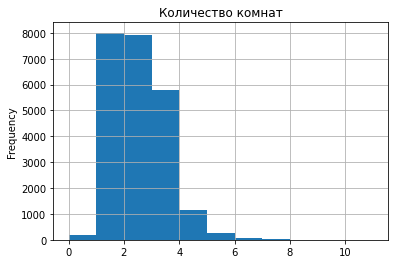

In [52]:
data_clear['rooms'].plot(kind='hist', bins=11, title='Количество комнат', grid=True)
print(data_clear['rooms'].describe())

In [53]:
data_clear.groupby('rooms')['last_price'].agg(['count', 'sum', 'mean']).sort_values(by = 'count', ascending = False)

,count,sum,mean
rooms,,,
1,8005,30682.936007,3.832971
2,7917,43988.444224,5.556201
3,5776,46185.938911,7.996181
4,1135,13430.834148,11.833334
5,265,4000.112858,15.094766
0,188,571.845900,3.041734
6,62,1025.747800,16.544319
7,20,373.640000,18.682000
8,2,38.290000,19.145000


Больше всего продаётся однокомнатных и двухкомнатных квартир.

Рассмотрим столбец с данными о **высоте потолков**:

count    23372.000000
mean         2.692592
std          0.209471
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


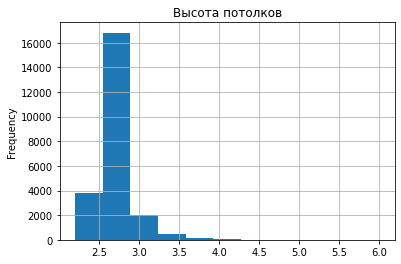

In [54]:
data_clear['ceiling_height'].plot(kind='hist', bins=11, title='Высота потолков', grid=True)
print(data_clear['ceiling_height'].describe())

Данные нами уже очищены, так что дополнительной очистки на данном этапе не требуется. Квартир с высотой более 3 метров совсем немного, возможно, это какие-то двухэтажные апартаменты.

Изучим данные о **времени продажи** недвижимости:

count    20249.000000
mean       179.724678
std        218.487702
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


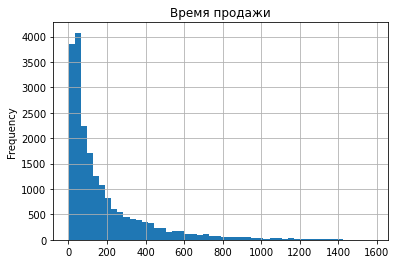

In [55]:
data_clear['days_exposition'].plot(kind='hist', bins=50, title='Время продажи', grid=True)
print(data_clear['days_exposition'].describe())

Среднее время, за которое удаётся продать квартиру - 179 дней, чаще всего - за 95 дней. При этом разброс значений очень велик - от 1 до 1580 дней, и всё-таки 75% квартир удаётся продать в сроки, не превышающие 230 дней. 

Попробуем рассмотреть очень быстрые (1-3 дня) и очень долгие продажи (свыше 700 дней):

In [56]:
print('Квартиры, проданные менее чем за 4 дня:')
data_clear.query('days_exposition <= 3')

Квартиры, проданные менее чем за 4 дня:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio
1632,19,4.000,49.9,2019-05-01,2,2.50,9,25.000000,1,False,...,1,681.0,1.0,0.08,2,5,2019,Первый,0.50,0.20
13061,20,6.100,51.4,2019-04-29,2,3.00,5,31.700000,4,False,...,0,0.0,2.0,0.12,0,4,2019,Другой,0.62,0.13
16053,4,4.070,45.1,2019-04-30,2,2.65,5,22.700000,3,False,...,0,0.0,2.0,0.09,1,4,2019,Другой,0.50,0.15
16212,0,7.806,25.0,2019-04-30,1,3.00,5,14.274505,5,False,...,0,0.0,2.0,0.31,1,4,2019,Последний,0.57,0.18


In [57]:
print('Квартиры, проданные более чем за 365 дней:')
data_clear.query('days_exposition >= 365')

Квартиры, проданные более чем за 365 дней:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio
2,10,5.196,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558.0,0.09,3,8,2015,Другой,0.61,0.15
3,0,64.900,159.00,2015-07-24,3,2.65,14,90.785854,9,False,...,3,234.0,424.0,0.41,4,7,2015,Другой,0.57,0.18
13,20,3.550,42.80,2017-07-01,2,2.56,5,27.000000,5,False,...,3,298.0,366.0,0.08,5,7,2017,Последний,0.63,0.12
16,11,6.700,82.00,2017-11-23,3,3.05,5,55.600000,1,False,...,0,0.0,397.0,0.08,3,11,2017,Первый,0.68,0.11
17,6,4.180,36.00,2016-09-09,1,2.65,17,16.500000,7,False,...,1,859.0,571.0,0.12,4,9,2016,Другой,0.46,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23672,5,3.000,30.80,2016-06-08,1,2.65,5,16.100000,3,False,...,0,0.0,808.0,0.10,2,6,2016,Другой,0.52,0.20
23675,8,3.550,39.50,2016-10-03,1,2.65,16,19.000000,13,False,...,0,0.0,721.0,0.09,0,10,2016,Другой,0.48,0.22
23691,11,9.470,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,1,806.0,519.0,0.13,3,10,2016,Другой,0.55,0.15
23692,2,1.350,30.00,2017-07-07,1,2.65,5,17.500000,4,False,...,0,0.0,413.0,0.05,4,7,2017,Другой,0.58,0.20


Проверим, зависит ли скорость продаж от города:

In [58]:
data_clear['too_fast'] = data['days_exposition'] <= 3    # добавим индикатор очень быстрых
data_clear['too_slow'] = data['days_exposition'] >= 365  # и очень медленных продаж
data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio,too_fast,too_slow
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,NaN,0.12,3,3,2019,Другой,0.47,0.23,False,False
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,81.0,0.08,1,12,2018,Первый,0.46,0.27,False,False
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,558.0,0.09,3,8,2015,Другой,0.61,0.15,False,True
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.785854,9,False,...,424.0,0.41,4,7,2015,Другой,0.57,0.18,False,True
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,121.0,0.10,1,6,2018,Другой,0.32,0.41,False,False


In [59]:
print('Города, в которых квартиры продаются медленно:')
city_slow = data_clear.pivot_table(index = 'locality_name', values = 'too_slow', aggfunc = ['mean', 'count'])
city_slow.columns = ['mean', 'count']
city_slow.sort_values(by = 'mean', ascending = False).head(10)

Города, в которых квартиры продаются медленно:


,mean,count
locality_name,,
посёлок Алексеевка,1.0,1
деревня Борисова Грива,1.0,1
посёлок Цвылёво,1.0,1
посёлок Севастьяново,1.0,1
деревня Большая Пустомержа,1.0,1
посёлок городского типа Большая Ижора,1.0,1
деревня Зимитицы,1.0,1
деревня Шпаньково,1.0,1
посёлок Пушное,1.0,2


В целом, видно, что "быстрые" и "медленные" продажи - это особенность конкретных объектов недвижимости (хороший или плохой ремонт, новый или старый дом), однако есть населённые пункты, в которых количество продаж невелико, и при этом квартиры продаются очень медленно.

Исключим очень быстрые и медленные продажи из статистики:

count    17255.000000
mean       104.509418
std         89.274518
min          3.000000
25%         37.000000
50%         74.000000
75%        153.500000
max        364.000000
Name: days_exposition, dtype: float64


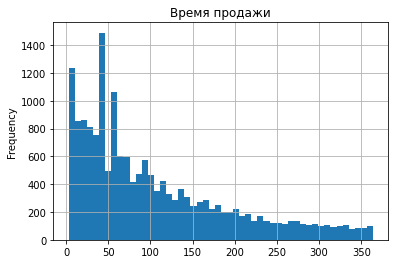

In [60]:
data_clear_2 = data_clear.query('too_fast == False and too_slow == False')
data_clear_2['days_exposition'].plot(kind='hist', bins=50, title='Время продажи', grid=True)
print(data_clear_2['days_exposition'].describe())

Если исключить несколько очень быстрых продаж и объекты, которые выставлялись более 365 дней, получим следующие параметры времени продаж:
Среднее время, за которое удаётся продать квартиру - 105 дней, чаще всего - за 74 дня, 75% квартир удаётся продать в сроки, не превышающие 153 дня. 

Проанализируем, какие параметры влияют на цену недвижимости. Рассмотрим следующие столбцы:
- общая площадь
- чило комнат
- удалённость от центра
- день недели, когда размещено объявление
- месяц размещения объявления
- год размещения объявления

Выделим нужные данные в отдельную таблицу:

In [61]:
data_price_analisys = data_clear_2.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'exposition_weekday', 'exposition_month', 'exposition_year']]
data_price_analisys.head()

,last_price,total_area,rooms,cityCenters_nearest,exposition_weekday,exposition_month,exposition_year
0,13.00,108.0,3,16028.0,3,3,2019
1,3.35,40.4,1,18603.0,1,12,2018
4,10.00,100.0,2,8098.0,1,6,2018
5,2.89,30.4,1,NaN,0,9,2018
6,3.70,37.3,1,19143.0,3,11,2017


Посчитаем коэффициенты корреляции и построим диаграммы рассеяния:

In [62]:
data_price_analisys.corr()

,last_price,total_area,rooms,cityCenters_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.712834,0.420629,-0.297140,-0.010606,-0.000653,-0.012146
total_area,0.712834,1.000000,0.785724,-0.229410,-0.009630,0.003914,-0.043934
rooms,0.420629,0.785724,1.000000,-0.155617,0.001246,-0.008175,-0.016486
cityCenters_nearest,-0.297140,-0.229410,-0.155617,1.000000,0.005436,-0.005481,0.004295
exposition_weekday,-0.010606,-0.009630,0.001246,0.005436,1.000000,0.015148,-0.019104
exposition_month,-0.000653,0.003914,-0.008175,-0.005481,0.015148,1.000000,-0.313261
exposition_year,-0.012146,-0.043934,-0.016486,0.004295,-0.019104,-0.313261,1.000000


Коэффициенты корреляции говорят о том, что на цену недвижимости оказывает существенное влияние общая площадь объекта. При этом стоит обратить внимание, что существет тесная связь между количеством комнат и площадью объекта, но количество комнат не оказывает столь же сильного прямого влияния на цену недвижимости. Отметим также, что стоило бы ожидать вляния на цену отдалённости от центра города, однако фактически в нашей выборке это не так. 

Посмотрим на диаграммы рассеяния, чтобы увидеть наглядно особенности в каждой паре столбцов:

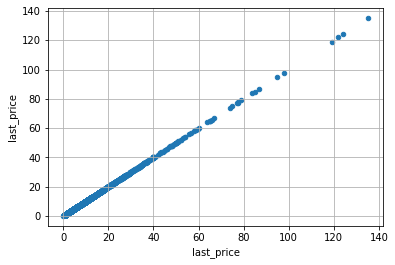

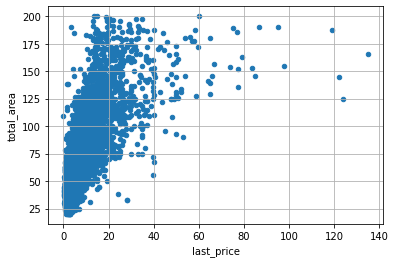

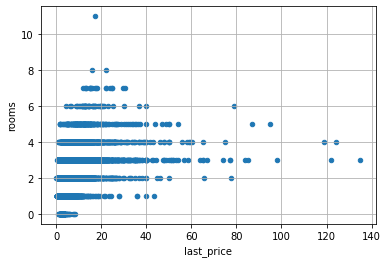

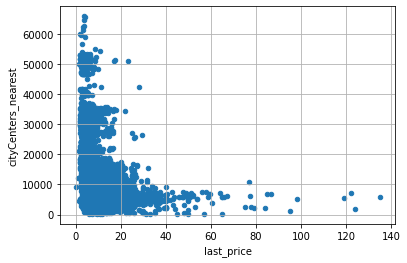

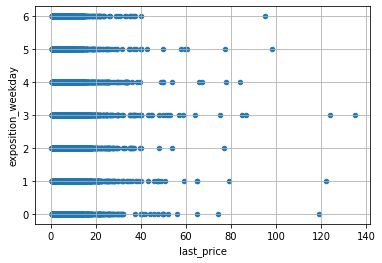

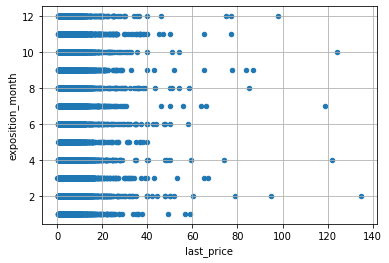

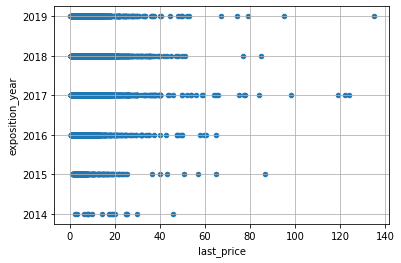

In [63]:
for column in data_price_analisys:
    data_price_analisys.plot(x = 'last_price', y = column, kind = 'scatter', grid = True)

**Цена/площадь:** на графике видно, что стоимость с ростом площади расчтёт не так быстро и например, за 20 млн. руб. можно купить как квартиру 50 кв.м., так и 200 кв.м. На графике также видны отдельные объекты "элитной" недвижимости, которые стоят в несколько раз больше, чем средние аналогичной площади. 

**Цена/количество комнат:** сильная прямая зависимость цены от количества комнат видна только на отрезке 0-3 комнаты, далее видим, что увеличение комнат не даёт пропорционального роста цены - например, самая дорогая квартира с 7ю комнатами стоит дешевле многих 3-комнатных.

**Цена/расстояние до центра:** вот почему не наблюдается прямой зависимости - наш график принял форму гиперболы. Большинство квартир, расположенных в центре, вполне укладываются в средние значения по стоимости, и в то же время есть большой сегмент дорогих квартир, все самые дорогие объекты (от 40 млн. руб.) расположены в пределах 10 км. от центра города. В то же время с ростом расстояния от центра стоимость "дешёвого" сегмента недвижимости практически не меняется: на расстоянии от 10 до 35 км. почти все объекты находятся в ценовом диапазоне до 20 млн.р., большая часть - до 10 млн. р.

**День недели/расстояние до центра:** цена недвижимости никак не зависит от дня недели, в котором размещено объявление, чуть выделяется только четверг.

**Месяц/расстояние до центра:** объявления размещают круглый год, никакой зависимости не прослеживаниется.

**Год/расстояние до центра:** по графику видно, что год на год не приходится - с 2015 до 2017 года цены объектов росли, затем снова упали почти до уровня 2016 года. 

Отдельно рассмотрим зависимость цены от **этажа, на котором расположена квартира**, поскольку этот столбец содержит категориальную переменную:

In [64]:
data_clear_2.pivot_table(index = 'floors_category', values = 'last_price', aggfunc = ['mean', 'median', 'count', 'min', 'max'])

,mean,median,count,min,max
,last_price,last_price,last_price,last_price,last_price
floors_category,,,,,
Другой,6.113357,4.75,15054,0.45000,124.0
Первый,4.658808,3.90,2453,0.43000,135.0
Последний,5.648412,4.25,2871,0.01219,119.0


Зависимости цены объекта от этажа существует: дешевле всего стоят квартиры на первых этажах. Чуть дороже, но тоже не очень ценятся - на последних. Самые ценные объекты - не первый, и не последний этаж. При этом самая дорогая в нашей выборке квартира расположилась как раз на первом этаже: у "элитной" недвижимости свой рынок.

Теперь проанализируем стоимость квадратных метров в разных населённых пунктах. 

In [65]:
top_10 = data_clear_2.pivot_table(index = 'locality_name', values = 'm_price', aggfunc = ['count', 'mean'])
top_10.columns = ['count', 'mean_m_price']
top_10 = top_10.sort_values(by = 'count', ascending = False).head(10)
top_10.sort_values(by = 'mean_m_price', ascending = False)

,count,mean_m_price
locality_name,,
Санкт-Петербург,13449,0.112929
Пушкин,321,0.102897
деревня Кудрово,259,0.092587
посёлок Парголово,287,0.090139
посёлок Мурино,498,0.086124
посёлок Шушары,394,0.079188
Колпино,304,0.075099
Всеволожск,344,0.069448
Гатчина,260,0.069423


Самая высокая стоимость квадратных метров в топ-10 ожидаемо в Санкт-Петербурге, самая низкая - в Выборге, почти в 2 раза ниже, чем в северной столице. 

**Проанализируем рынок жилья в Санкт-Петербурге.**

In [66]:
data_spb = data_clear_2.query('locality_name == "Санкт-Петербург"') # фильтруем данные по городу
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio,too_fast,too_slow
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,NaN,0.12,3,3,2019,Другой,0.47,0.23,False,False
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,121.0,0.10,1,6,2018,Другой,0.32,0.41,False,False
7,5,7.915,71.60,2019-04-18,2,2.65,24,40.882183,22,False,...,NaN,0.11,3,4,2019,Другой,0.57,0.26,False,False
9,18,5.400,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,289.0,0.09,6,2,2017,Другой,0.71,0.11,False,False
10,5,5.050,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,137.0,0.13,3,11,2017,Другой,0.51,0.21,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3.200,39.00,2017-12-16,1,2.65,9,20.000000,6,False,...,38.0,0.08,5,12,2017,Другой,0.51,0.28,False,False
23688,19,9.200,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,23.0,0.09,0,4,2019,Другой,0.62,0.15,False,False
23689,13,3.550,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,29.0,0.10,2,2,2018,Другой,0.46,0.26,False,False
23690,3,5.500,52.00,2018-07-19,2,2.65,5,31.000000,2,False,...,15.0,0.11,3,7,2018,Другой,0.60,0.12,False,False


Мы оставили пропуски в данных о расстоянии до центра. Посмотрим, сколько таких пропусков попало в наш срез по Петербургу:

In [67]:
data_spb.loc[data_spb['cityCenters_nearest'].isna() == True]['last_price'].count()

54

Всего 54 при 13,5 тыс. наблюдений. Удалим строки с пропущенными значениями:

In [68]:
data_spb.dropna(subset = ['cityCenters_nearest'], inplace = True)

<ipython-input-68-3f08c2dce2b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb.dropna(subset = ['cityCenters_nearest'], inplace = True)


Добавим столбец с расстоянием до центра в километрах:

In [69]:
data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest'] / 1000).astype('int')
data_spb.head()

<ipython-input-69-9cdc8cad4f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_km'] = (data_spb['cityCenters_nearest'] / 1000).astype('int')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio,too_fast,too_slow,cityCenters_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0.12,3,3,2019,Другой,0.47,0.23,False,False,16
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0.10,1,6,2018,Другой,0.32,0.41,False,False,8
7,5,7.915,71.6,2019-04-18,2,2.65,24,40.882183,22,False,...,0.11,3,4,2019,Другой,0.57,0.26,False,False,11
9,18,5.400,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,0.09,6,2,2017,Другой,0.71,0.11,False,False,15
10,5,5.050,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,0.13,3,11,2017,Другой,0.51,0.21,False,False,13


Посчитаем среднюю цену недвижимости для каждого километра:

In [70]:
km_price = data_spb.pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc = 'mean')
km_price

,last_price
cityCenters_km,
0,16.036664
1,13.567426
2,12.188091
3,10.327287
4,11.486779
5,11.992784
6,12.237884
7,10.253164
8,8.123175


<AxesSubplot:xlabel='cityCenters_km'>

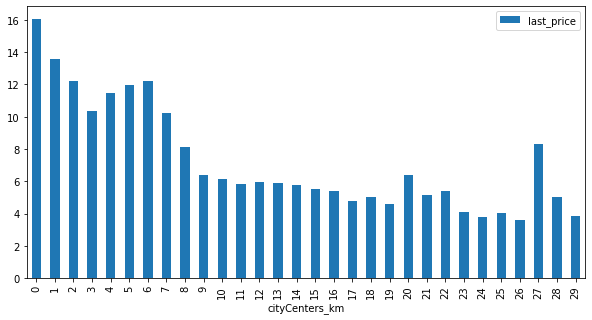

In [71]:
km_price.plot(y = 'last_price', kind = 'bar', figsize = (10,5))

Стоимость недвижимости существенно снижается после 7го километра от центра Санкт-Петербурга. Таким образом, будем считать центральной зоной радиус в 7 километров от центра города.

Посмотрим, с чем связан скачок стоимости на 27-м километре (возможно, там расположен какой-то элитный посёлок или популярный пригород.):

In [72]:
data_spb.query('cityCenters_km == 27')[['last_price', 'total_area', 'locality_name', 'airports_nearest', 'm_price']]

,last_price,total_area,locality_name,airports_nearest,m_price
748,14.35,74.0,Санкт-Петербург,23888.0,0.19
5961,2.25,32.0,Санкт-Петербург,24006.0,0.07


Предположение неверно - это просто отдельный выброс - квартира, оцененная по каким-то причинам намного выше, чем средние по рынку в этом радиусе.

Выделим сегмент квартир в центре:

In [73]:
data_spb.query('cityCenters_km <= 7').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,m_price,exposition_weekday,exposition_month,exposition_year,floors_category,living_total_ratio,kitchen_total_ratio,too_fast,too_slow,cityCenters_km
24,8,6.500,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,0.07,5,10,2015,Первый,0.48,0.20,False,False,2
52,20,11.795,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,0.09,4,9,2017,Последний,0.69,0.08,False,False,6
63,2,20.000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,0.17,1,9,2018,Другой,0.58,0.14,False,False,4
94,3,3.500,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,0.12,4,4,2019,Другой,0.53,0.19,False,False,7
99,32,9.600,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,0.11,1,9,2017,Другой,0.74,0.09,False,False,2


Рассмотрим подробно следующие параметры объектов в Санкт-Петербурге:
- цена
- общая площадь
- число комнат
- высота потолков

In [74]:
data_spb_analisys = data_spb.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height']]
data_spb_analisys.head()

,last_price,total_area,rooms,ceiling_height
0,13.000,108.0,3,2.70
4,10.000,100.0,2,3.03
7,7.915,71.6,2,2.65
9,5.400,61.0,3,2.50
10,5.050,39.6,1,2.67


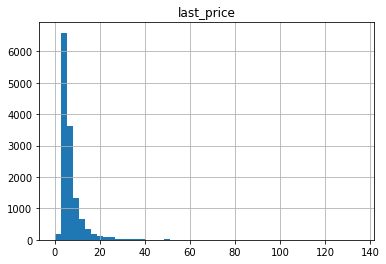

count    13395.000000
mean         7.083319
std          6.046768
min          0.012190
25%          4.164500
50%          5.400000
75%          7.702551
max        135.000000
Name: last_price, dtype: float64


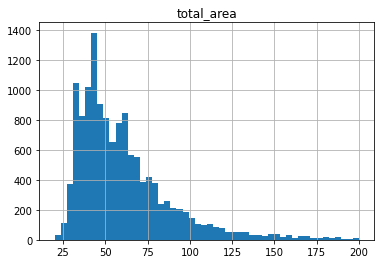

count    13395.000000
mean        60.463574
std         27.904664
min         20.000000
25%         41.200000
50%         53.800000
75%         71.710000
max        200.000000
Name: total_area, dtype: float64


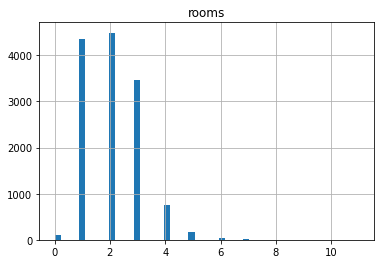

count    13395.000000
mean         2.093169
std          1.023165
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


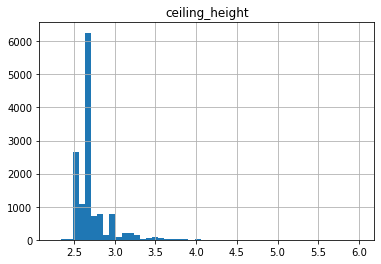

count    13395.000000
mean         2.709351
std          0.227597
min          2.260000
25%          2.600000
50%          2.650000
75%          2.735000
max          6.000000
Name: ceiling_height, dtype: float64


In [75]:
for column in data_spb_analisys:
    data_spb_analisys.hist(column, bins = 50, grid = True)
    plt.show()
    print(data_spb_analisys[column].describe())

А теперь проанализируем те же параметры для центральной области:

In [76]:
data_spb_center_analisys = data_spb.query('cityCenters_km <= 7').loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height']]
data_spb_center_analisys.head()

,last_price,total_area,rooms,ceiling_height
24,6.500,97.2,2,2.65
52,11.795,136.0,6,3.00
63,20.000,118.0,3,3.00
94,3.500,29.5,1,2.50
99,9.600,90.0,4,2.65


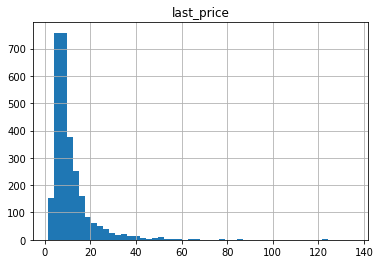

count    2846.000000
mean       11.658303
std        10.293482
min         1.600000
25%         6.400000
50%         8.600000
75%        12.996750
max       135.000000
Name: last_price, dtype: float64


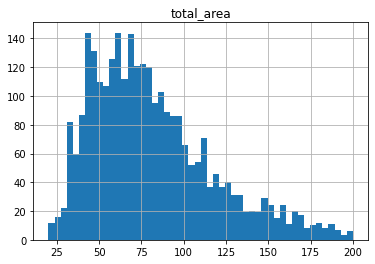

count    2846.000000
mean       81.004722
std        36.021867
min        20.000000
25%        54.000000
50%        74.000000
75%       100.000000
max       200.000000
Name: total_area, dtype: float64


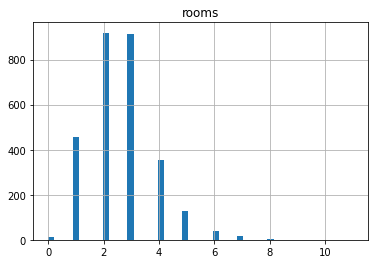

count    2846.000000
mean        2.628602
std         1.199946
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64


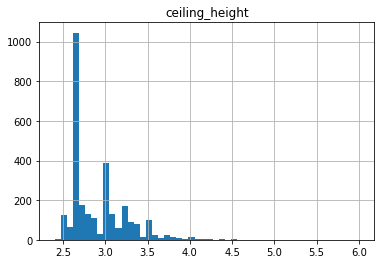

count    2846.000000
mean        2.909181
std         0.349389
min         2.400000
25%         2.650000
50%         2.785000
75%         3.100000
max         6.000000
Name: ceiling_height, dtype: float64


In [77]:
for column in data_spb_center_analisys:
    data_spb_center_analisys.hist(column, bins = 50, grid = True)
    plt.show()
    print(data_spb_center_analisys[column].describe())

Сравнив данные, можно сделать вывод, что в цетральной области Санкт-Петербурга (радиус 7 км от центра) квартиры просторнее и дороже, чем в целом по городу. Медианные значения цен равны 8,6 и 5,4 млн. р. соответственно. Медиана площади квартир - 74 и 54 кв.м. соответственно. Чаще всего в центре продаются 3-комнатные квартиры, тогда как в целом по городу - 2-комнатные. Медианная высота потолков в центре немного больше, чем по городу: 2,8 м. против 2,65 м. 

Теперь рассмотрим факторы, которые могут влиять на стоимость квартир в центре:

In [78]:
spb_price_analisys = data_spb.query('cityCenters_km <= 7').loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'exposition_month', 'exposition_year']]
spb_price_analisys.head()

,last_price,total_area,rooms,cityCenters_nearest,exposition_month,exposition_year
24,6.500,97.2,2,2336.0,10,2015
52,11.795,136.0,6,6582.0,9,2017
63,20.000,118.0,3,4800.0,9,2018
94,3.500,29.5,1,7303.0,4,2019
99,9.600,90.0,4,2818.0,9,2017


In [79]:
spb_price_analisys.corr()

,last_price,total_area,rooms,cityCenters_nearest,exposition_month,exposition_year
last_price,1.000000,0.631369,0.331364,-0.047461,-0.027728,-0.020275
total_area,0.631369,1.000000,0.772375,-0.165680,-0.036276,-0.054031
rooms,0.331364,0.772375,1.000000,-0.197613,-0.032084,-0.015149
cityCenters_nearest,-0.047461,-0.165680,-0.197613,1.000000,0.004446,-0.002904
exposition_month,-0.027728,-0.036276,-0.032084,0.004446,1.000000,-0.295128
exposition_year,-0.020275,-0.054031,-0.015149,-0.002904,-0.295128,1.000000


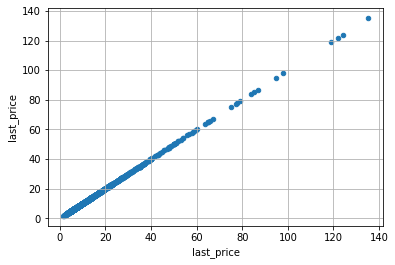

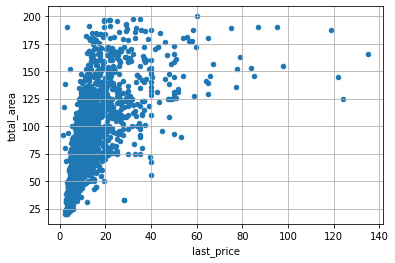

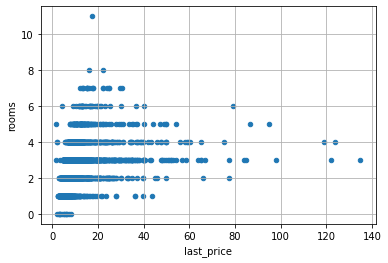

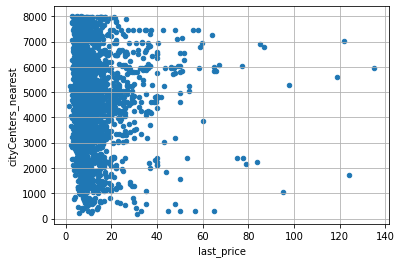

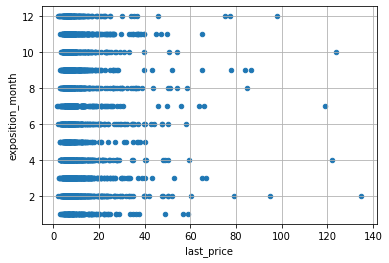

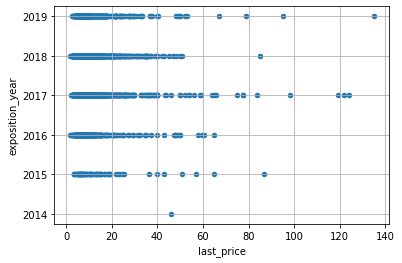

In [80]:
for column in spb_price_analisys:
    spb_price_analisys.plot(x = 'last_price', y = column, kind = 'scatter', grid = True)

В целом, в центре Санк-Петербурга картина схожа с той, что мы увидели при анализе всех данных: на стоимость квартиры существенное влияние оказывает только площадь квартиры. 

## Вывод
В ходе анализа исходные данные несколько раз были очищены от экстремальных выбросов:
- исключены слишком маленькие и слишком большие по площади квартиры
- исключены самые дорогие объекты недвижимости
- исключены слишком быстрые (менее 3 дней) и медленные (более года) продажи.

Проанализированы факторы, которые могут оказывать влияние на стоимость недвижимости, сделан вывод о существенном влиянии на стоимость только одного фактора: общей площади объекта. Остальные факторы либо не оказывают никакого влияния, либо оказывают не такое существеное (количество комнат, которое тесно коррелирует с общей площадью, и этаж, на котором расположена квартира).

Проанализированы 10 городов с наибольшим количеством объявлений и проведён сравнительный анализ стоимости квадратного метра жилья. Лидирует ожидаемо Санкт-Петербург, дешевле всего квадратный метр стоит в Выборге.

Отдельно проанализирован рынок жилья в Санкт-Петербурге. Выделена центральная область с наибольшей стоимостью жилья - это радиус 7 км. от центра города. Можно сделать вывод, что в центре квартиры дороже, просторнее, чаще продаются 3-комнатные, высота потолков в среднем выше, чем в целом по городу. Факторный анализ привёл к тем же выводам, что и в целом по выборке: на стоимость жилья в центре Санкт-Петербурга существенное влияние оказывает площадь объекта, в гораздо меньшей степени - количество комнат. 